In [9]:
# 读取资产数据
import numpy as np
import pandas as pd

AssetPrice = pd.read_csv("./csv/AssetPrice2.csv", index_col=0, header=0, parse_dates=True, infer_datetime_format=True, encoding="utf-8")
# AssetPrice = AssetPrice.rename(columns={"000300.SH": "Stock", "H11001": "Bond", "H11025": "Cash", "AUCI.SHF": "Gold"})
# AssetPrice = AssetPrice.rename(columns={"000300.SH": "CN_Stock", "H11001": "Bond", "H11025": "Cash", "AUCI.SHF": "Gold", ".GSPC.NYSE": "US_Stock", "HSI.HK": "HK_Stock"})
AssetPrice = AssetPrice.rename(columns={"000300.SH": "CN_Big_Stock", "000905.SH": "CN_Mid_Stock", "000852.SH": "CN_Small_Stock", "H11006": "T_Bond", "H11007": "F_Bond", "H11008": "C_Bond", "H11025": "Cash", "AUCI.SHF": "Gold", ".GSPC.NYSE": "US_Stock", "HSI.HK": "HK_Stock"})

In [10]:
# 估计年化收益率和年化波动率
Return = (AssetPrice.iloc[-1] / AssetPrice.iloc[0]) ** (365 / (AssetPrice.index[-1] - AssetPrice.index[0]).days) - 1
Cov = AssetPrice.pct_change().cov() * 252

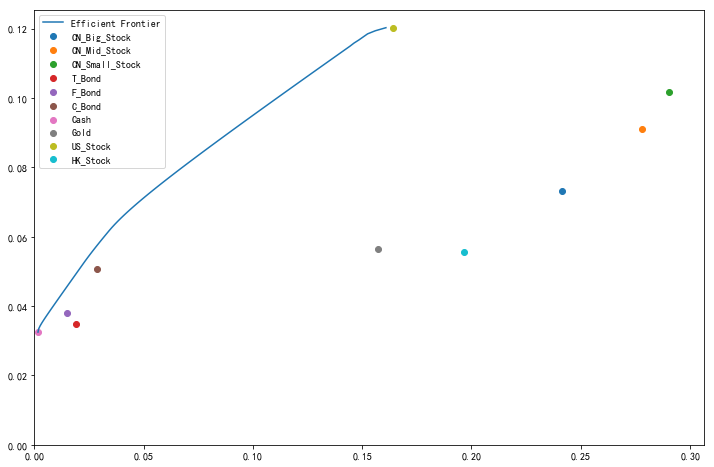

In [11]:
# 有效前沿
from QuantStudio.Tools import PortfolioModel

# r1, sigma1 = PortfolioModel.calcEfficientFrontier(Cov.values, Return.values, allow_short=True)
r2, sigma2 = PortfolioModel.calcEfficientFrontier(Cov.values, Return.values, allow_short=False)

import matplotlib.pyplot as plt
Fig, Axes = plt.subplots(1, 1, figsize=(12, 8))
# Axes.plot(sigma1, r1, label="Efficient Frontier")
Axes.plot(sigma2, r2, label="Efficient Frontier")
for i, iAsset in enumerate(Return.index):
    Axes.scatter(Cov.values[i, i]**0.5, Return.values[i], label=Return.index[i])
Axes.set_xlim(left=0)
Axes.set_ylim(bottom=0)
Axes.legend(loc="best");

In [12]:
Cov

,CN_Big_Stock,CN_Mid_Stock,CN_Small_Stock,T_Bond,F_Bond,C_Bond,Cash,Gold,US_Stock,HK_Stock
CN_Big_Stock,0.058362,0.057883,0.056099,-0.000211,-0.000024,0.000266,0.000005,0.002748,0.005662,0.025692
CN_Mid_Stock,0.057883,0.077247,0.079205,-0.000246,-0.000011,0.000394,0.000015,0.002491,0.005210,0.023866
CN_Small_Stock,0.056099,0.079205,0.084279,-0.000252,-0.000016,0.000441,0.000013,0.002536,0.004874,0.023286
T_Bond,-0.000211,-0.000246,-0.000252,0.000362,0.000202,0.000107,0.000003,0.000015,-0.000074,-0.000148
F_Bond,-0.000024,-0.000011,-0.000016,0.000202,0.000223,0.000111,0.000004,0.000048,0.000054,-0.000093
C_Bond,0.000266,0.000394,0.000441,0.000107,0.000111,0.000817,0.000004,0.000100,-0.000016,0.000037
Cash,0.000005,0.000015,0.000013,0.000003,0.000004,0.000004,0.000003,0.000009,0.000004,0.000005
Gold,0.002748,0.002491,0.002536,0.000015,0.000048,0.000100,0.000009,0.024710,0.000768,0.003106
US_Stock,0.005662,0.005210,0.004874,-0.000074,0.000054,-0.000016,0.000004,0.000768,0.026907,0.007837
HK_Stock,0.025692,0.023866,0.023286,-0.000148,-0.000093,0.000037,0.000005,0.003106,0.007837,0.038659


In [15]:
D = np.diag(1 / np.diag(Cov.values)**0.5)
Rho = pd.DataFrame(np.dot(D, np.dot(Cov.values, D)), index=Cov.index, columns=Cov.columns)
Rho

,CN_Big_Stock,CN_Mid_Stock,CN_Small_Stock,T_Bond,F_Bond,C_Bond,Cash,Gold,US_Stock,HK_Stock
CN_Big_Stock,1.000000,0.862077,0.799889,-0.045784,-0.006779,0.038523,0.010884,0.072357,0.142892,0.540900
CN_Mid_Stock,0.862077,1.000000,0.981644,-0.046514,-0.002675,0.049650,0.030960,0.057019,0.114282,0.436731
CN_Small_Stock,0.799889,0.981644,1.000000,-0.045679,-0.003656,0.053138,0.026940,0.055580,0.102357,0.407960
T_Bond,-0.045784,-0.046514,-0.045679,1.000000,0.712414,0.196303,0.098245,0.005027,-0.023668,-0.039646
F_Bond,-0.006779,-0.002675,-0.003656,0.712414,1.000000,0.260934,0.174494,0.020541,0.022185,-0.031839
C_Bond,0.038523,0.049650,0.053138,0.196303,0.260934,1.000000,0.071019,0.022237,-0.003431,0.006633
Cash,0.010884,0.030960,0.026940,0.098245,0.174494,0.071019,1.000000,0.034685,0.013383,0.013783
Gold,0.072357,0.057019,0.055580,0.005027,0.020541,0.022237,0.034685,1.000000,0.029771,0.100489
US_Stock,0.142892,0.114282,0.102357,-0.023668,0.022185,-0.003431,0.013383,0.029771,1.000000,0.242994
HK_Stock,0.540900,0.436731,0.407960,-0.039646,-0.031839,0.006633,0.013783,0.100489,0.242994,1.000000
